In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("E:\ex2data1.txt",names=['Exam_1','Exam_2','Admitted'])
data

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
positive = data[data['Admitted']== 1]
negative = data[data['Admitted']== 0]

NameError: name 'l1' is not defined

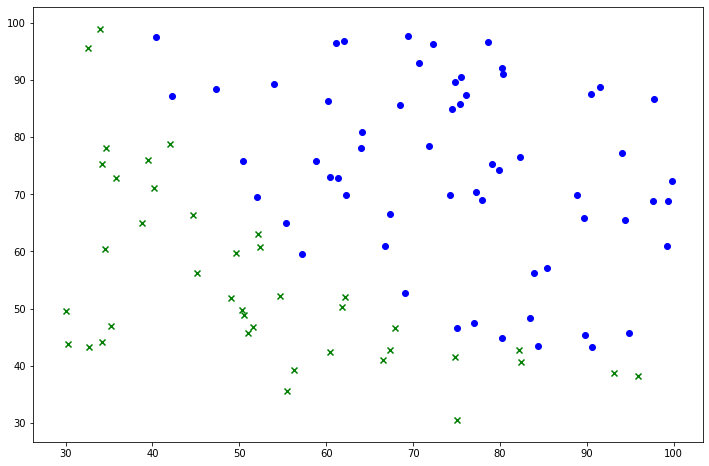

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam_1'],positive['Exam_2'], c ='b',marker ='o')
ax.scatter(negative['Exam_1'],negative['Exam_2'], c ='g',marker ='x')
ax.scatter(l1,l2,c = 'g')

In [7]:
def computecost(X,y,theta):
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
data.insert(0,'ones',1)

In [23]:
data.head()

,ones,Exam_1,Exam_2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [24]:
X = data.iloc[:,0:3]
y = data.iloc[:,3:4]

In [25]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix([0,0,0])

In [26]:
X

matrix([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178],
        [ 1.        , 61.10666454, 96.51142588],
        [ 1.        , 75.02474557, 46.55401354],
        [ 1.        , 76.0987867 , 87.42056972],
        [ 1.        , 84.43281996, 43.53339331],
        [ 1.        , 95.86155507, 38.22527806],
        [ 1.        , 75.01365839, 30.60326323],
        [ 1.        , 82.30705337, 76.4819633 ],
        [ 1.        , 69.36458876, 97.71869196],
        [ 1.        , 39.53833914, 76.03681085],
        [ 1.        , 53.97105215, 89.20735014],
        [ 1.        , 69.07014406, 52.74046973],
        [ 1.        , 67.94685548, 46.67857411],
        [ 1.        , 70.66150955, 92.92713789],
        [ 1.        , 76.97878373, 47.57596365],
        [ 1.        

In [27]:
computecost(X,y,theta)

0.6931471805599453

In [28]:
def gradientdescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = 3
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]= computecost(X,y,theta)
    return theta,cost

In [29]:
final_theta , cost_matrix = gradientdescent(X,y,theta,0.001,100000)

In [30]:
final_theta

matrix([[-4.81180027,  0.04528064,  0.03819149]])

In [31]:
cost_matrix

array([0.69829069, 0.65971176, 0.66162727, ..., 0.38739176, 0.38739064,
       0.38738952])

In [32]:
cost_matrix[-1]

0.3873895227111881

In [20]:
predicted_probabilities = sigmoid(X*final_theta.T)

In [21]:
predicted_probabilities

matrix([[0.43434648],
        [0.14629219],
        [0.40026459],
        [0.7702209 ],
        [0.83812827],
        [0.34987375],
        [0.83767969],
        [0.58984764],
        [0.87790337],
        [0.66239315],
        [0.72884151],
        [0.43872223],
        [0.86248399],
        [0.88706398],
        [0.47065389],
        [0.73865808],
        [0.58175388],
        [0.51189809],
        [0.87400286],
        [0.62030559],
        [0.46876877],
        [0.85343466],
        [0.3412618 ],
        [0.17161445],
        [0.79426202],
        [0.66363522],
        [0.62973204],
        [0.70813315],
        [0.47683333],
        [0.36048216],
        [0.67877225],
        [0.77456532],
        [0.48965665],
        [0.54899073],
        [0.43245413],
        [0.41489608],
        [0.62243273],
        [0.76569758],
        [0.54052487],
        [0.40359642],
        [0.75728325],
        [0.33443923],
        [0.87748549],
        [0.61519001],
        [0.32075856],
        [0

In [22]:
threshhold = 0.58
y_pred = [1 if X > threshhold else 0 for X in predicted_probabilities]

In [23]:
y = np.array(y).ravel()
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
count = 0
for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        count += 1
print(count*100/len(y),"% accuracy")

NameError: name 'y_pred' is not defined

In [26]:
l1 = []
l2 = []
X1 = np.linspace(0,100,1000)
X2 = np.linspace(0,100,1000)
for i in X1:
    for j in X2:
        p = final_theta[0,0]+ final_theta[0,1]*i + final_theta[0,2]*j
        if p > 0.49 and p < 0.50:
            l1.append(i)
            l2.append(j)       

In [29]:
l1

[32.832832832832835,
 32.832832832832835,
 32.932932932932935,
 32.932932932932935,
 32.932932932932935,
 33.033033033033036,
 33.033033033033036,
 33.033033033033036,
 33.133133133133136,
 33.133133133133136,
 33.133133133133136,
 33.233233233233236,
 33.233233233233236,
 33.333333333333336,
 33.333333333333336,
 33.433433433433436,
 33.433433433433436,
 33.433433433433436,
 33.533533533533536,
 33.533533533533536,
 33.533533533533536,
 33.633633633633636,
 33.633633633633636,
 33.633633633633636,
 33.733733733733736,
 33.733733733733736,
 33.833833833833836,
 33.833833833833836,
 33.933933933933936,
 33.933933933933936,
 33.933933933933936,
 34.034034034034036,
 34.034034034034036,
 34.034034034034036,
 34.134134134134136,
 34.134134134134136,
 34.134134134134136,
 34.234234234234236,
 34.234234234234236,
 34.334334334334336,
 34.334334334334336,
 34.434434434434436,
 34.434434434434436,
 34.434434434434436,
 34.53453453453454,
 34.53453453453454,
 34.53453453453454,
 34.634634634634

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 100)

In [38]:
logReg = LogisticRegression()

In [39]:
logReg.fit(X_train,y_train)

C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logReg.score(X_train,y_train)

0.8857142857142857

In [42]:
logReg.score(X_test,y_test)

0.8333333333333334

In [43]:
logReg.intercept_,logReg.coef_ #all theta values

(array([-2.30504603]), array([[-2.30504603,  0.04730818,  0.03413388]]))

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=5,max_features=3,max_leaf_nodes= 10)

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
dt.score(X_train,y_train),dt.score(X_test,y_test)# this is not overfitting

(1.0, 0.9333333333333333)